<a href="https://colab.research.google.com/github/albreyes/python/blob/main/arbolDecisionScikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Arból de decisión con scikit learn

A continuación, presentaremos un ejemplo de cómo implementar un árbol de decisión utilizando scikit-learn:

In [ ]:
# Importar las bibliotecas necesarias
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import numpy as np
from subprocess import check_call
from IPython.display import Image as PImage

En este ejemplo, estamos utilizando el conjunto de datos de ejemplo *iris* de scikit-learn, que consiste en la clasificación de diferentes especies de iris. Primero, cargamos el conjunto de datos y lo dividimos en conjuntos de entrenamiento y prueba.

In [ ]:
# Cargar el conjunto de datos de ejemplo (iris)
iris = datasets.load_iris()
X = iris.data
y = iris.target
type(iris.data)
#iris.feature_names
irisdataframe=pd.DataFrame(iris.data,columns=iris.feature_names)
#irisdataframe
#iris.target_names

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Luego, creamos una instancia de la clase DecisionTreeClassifier para representar nuestro árbol de decisión.

In [ ]:
# Crear el modelo de árbol de decisión
clf = DecisionTreeClassifier()

A continuación, entrenamos el modelo utilizando los datos de entrenamiento y realizamos predicciones en los datos de prueba.

In [ ]:
# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Visualizamos el árbol

In [ ]:
# Visualizar el árbol de decisión
#plot_tree(clf)

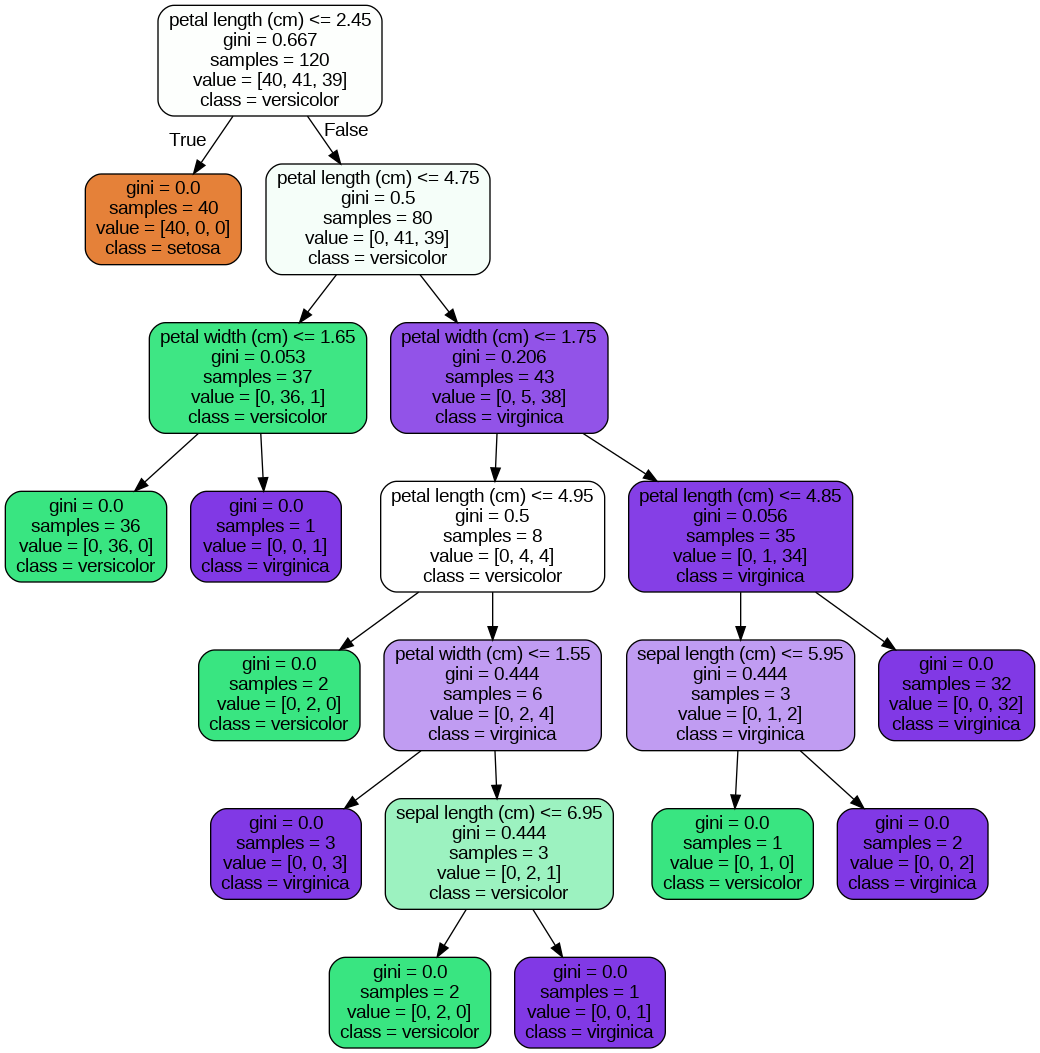

In [ ]:
# exportar el modelo a archivo .dot
with open(r"tree2.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,
                              max_depth = 10,
                              impurity = True,
                              #feature_names = list(irisdataframe),
                              feature_names = iris.feature_names,
                              class_names = iris.target_names,
                              rounded = True,
                              filled= True )

# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree2.dot','-o',r'tree2.png'])
PImage(filename="tree2.png",width=600)

In [ ]:
clf.classes_

array([0, 1, 2])

In [ ]:
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

Finalmente, calculamos la precisión del modelo comparando las etiquetas predichas con las etiquetas reales.

In [ ]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)


Precisión: 1.0
